<a href="https://colab.research.google.com/github/yongjaeahn/UwpQuickStart/blob/master/korean/source/%EC%9E%84%EC%8B%9C_%EC%BD%94%EB%93%9C_%EB%B3%B4%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow.keras.datasets.mnist as mnist

(x_train,_), (_,_) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = x_train.reshape(60000,784)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU

random_dim = 100
generator = Sequential()
generator.add(Dense(256,input_dim=random_dim))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784,activation='tanh'))

In [ ]:
from tensorflow.keras.layers import Dropout

discriminator = Sequential()
discriminator.add(Dense(1024,input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(1,activation='sigmoid'))

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

discriminator.trainable = False
gan_input = Input(shape=(random_dim,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(inputs=gan_input,outputs=gan_output)

In [ ]:
discriminator.compile(loss='binary_crossentropy',optimizer='adam')
gan.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
import matplotlib.pyplot as plt

d_losses = []
g_losses = []

def save_generated_images(epoch,examples=100,dim=(10,10),figsize=(10,10)):
  noise = np.random.normal(0,1,size=[examples,random_dim])
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(examples,28,28)
  generated_images = generated_images * 127.5 + 127.5
  generated_images = generated_images.astype(np.int_)

  plt.figure(figsize=figsize)
  for i in range(generated_images.shape[0]):
    plt.subplot(dim[0],dim[1],i+1)
    plt.imshow(generated_images[i],interpolation='nearest',cmap='gray_r')
    plt.axis('off')
  plt.tight_layout()
  plt.savefig(f'gan_generated_image_epoch_{epoch:d}.png')

def plot_loss(epoch):
  plt.figure(figsize=(10,8))
  plt.plot(d_losses,label="Discriminitive Loss")
  plt.plot(g_losses,label="Generative Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.savefig(f'gan_loss_epoch_{epoch:d}.png')

def train(epochs=1,batch_size=128):
  batch_count = int(x_train.shape[0] / batch_size)

  for epoch in range(1,epochs+1):
    for _ in range(batch_count):
      #print('before: noise = np.random.normal(0,1,size=[batch_size,random_dim])')
      noise = np.random.normal(0,1,size=[batch_size,random_dim])
      image_batch = x_train[np.random.randint(0,x_train.shape[0],size=batch_size)]

      #print('before: generated_images = generator.predict(noise)')
      generated_images = generator.predict(noise)
      x = np.concatenate([image_batch,generated_images])

      #print('before: y_dis = np.zeros(2*batch_size)')
      y_dis = np.zeros(2*batch_size)
      y_dis[:batch_size] = 0.9

      discriminator.trainable = True
      d_loss = discriminator.train_on_batch(x,y_dis)

      #print('before: noise = np.random.normal(0,1,size=[batch_size,random_dim])')
      noise = np.random.normal(0,1,size=[batch_size,random_dim])
      y_gen = np.ones(batch_size)
      discriminator.trainable = False
      g_loss = gan.train_on_batch(noise,y_gen)

    #print('before: d_losses.append(d_loss)')
    d_losses.append(d_loss)
    g_losses.append(g_loss)

    if epoch == 1 or epoch % 10 == 0:
      save_generated_images(epoch)
      plot_loss(epoch)

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image

classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url,input_shape=(224,224) + (3,))])

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize((224,224))
grace_hopper = np.array(grace_hopper)/255.0

result = classifier.predict(grace_hopper[np.newaxis,...])
predicted_class = np.argmax(result[0])
print()

1/1 [==============================] - 0s 421ms/step
653


In [ ]:
result

array([[ 0.19971317,  1.0666476 , -0.10109331, ...,  0.15688556,
        -0.60558677, -0.04497562]], dtype=float32)

In [ ]:
grace_hopper

'/root/.keras/datasets/image.jpg'

In [ ]:
# 폰트 라이브러리를 보는 코드
from matplotlib import font_manager

fontList = [font.name for font in font_manager.fontManager.ttflist]

for font in fontList:
    print(font)

cmr10
DejaVu Serif
STIXSizeTwoSym
DejaVu Sans Mono
DejaVu Sans
STIXGeneral
STIXNonUnicode
cmb10
DejaVu Serif
STIXGeneral
cmmi10
STIXSizeThreeSym
DejaVu Sans
STIXNonUnicode
DejaVu Sans
cmsy10
cmex10
STIXGeneral
DejaVu Serif
STIXSizeFiveSym
STIXSizeFourSym
STIXGeneral
DejaVu Sans Display
STIXNonUnicode
DejaVu Sans Mono
DejaVu Sans Mono
STIXSizeOneSym
STIXSizeTwoSym
DejaVu Serif Display
STIXNonUnicode
STIXSizeOneSym
cmss10
DejaVu Sans
cmtt10
STIXSizeThreeSym
DejaVu Sans Mono
STIXSizeFourSym
DejaVu Serif
Liberation Serif
Liberation Mono
Liberation Sans
Liberation Serif
Liberation Sans
Liberation Sans Narrow
Humor Sans
Liberation Serif
Liberation Sans Narrow
Liberation Mono
Liberation Sans
Liberation Mono
Liberation Sans Narrow
Liberation Mono
Liberation Serif
Liberation Sans
Liberation Sans Narrow


방정식 : f(x)= x**2 + 2*x + 1
미분한 방정식 : 2*x + 2
x값이 -7.5일때 미분계수 : -13.0000000000000
x값이 5일때 미분계수 : 12


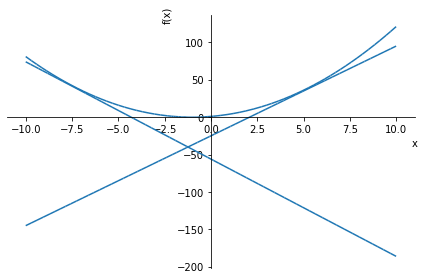

In [ ]:
# 그래프의 세부적인 제어가 어려워 사용하지 않는 것이 좋을 듯 (line_color 등의 그래프별로 적용되지 않음)
# 대신 numpy와 matplotlib으로 작성하여 미분을 설명할 때 추가함
import sympy as sp

x = sp.Symbol('x')
fx = x**2 + 2*x + 1

fxDiff = sp.diff(fx, x)
print('방정식 : f(x)=', fx)
print('미분한 방정식 :',fxDiff)

print('x값이 -7.5일때 미분계수 :', fxDiff.subs({x:-7.5}))
print('x값이 5일때 미분계수 :', fxDiff.subs({x:5}))

fxDiff01 = fxDiff.subs({x:-7.5}) * x - 56
fxDiff02 = fxDiff.subs({x:5}) * x - 25

sp.plot(fx,fxDiff01,fxDiff02)

In [ ]:
# 그저 테스트
class Tool:
    def __init__(self,name,weight):
        self.name = name
        self.weight = weight

    def __repr__(self):
        return f'Tool({self.name},{self.weight})'

print(Tool('수준계',3.5))
repr(Tool('수준계',3.5))

Tool(수준계,3.5)


'Tool(수준계,3.5)'

In [ ]:
# 그저 테스트
class Tool:
    def __init__(self,name,weight):
        self.name = name
        self.weight = weight

    def __repr__(self):
        #return f'Tool({self.name},{self.weight})'
        return f'Tool({self.name!r},{self.weight})' # !r의 Raw String의 의미인 것으로 보인다.

print(Tool('수준계',3.5))
repr(Tool('수준계',3.5))

In [ ]:
# 그저 테스트
import numpy as np
import math

arrayVector = np.array([1,2,3])
print(np.diag(arrayVector))
arrayMatrix2d = np.random.randint(100,size=(3,3))
print(arrayMatrix2d)
print(np.diag(arrayMatrix2d))
print(np.trace(arrayMatrix2d))
print(np.triu(arrayMatrix2d))
print(np.tril(arrayMatrix2d))
print(np.transpose(arrayMatrix2d))
print(np.linalg.inv(arrayMatrix2d))
print(np.round((arrayMatrix2d @ np.linalg.inv(arrayMatrix2d)),3))
print(np.linalg.det(arrayMatrix2d))
print(np.eye(np.ndim(arrayMatrix2d)))
print(np.hstack((arrayMatrix2d,np.eye(np.shape(arrayMatrix2d)[0]))))

[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[80 95 57]
 [49 44 48]
 [60 89 69]]
[80 44 69]
193
[[80 95 57]
 [ 0 44 48]
 [ 0  0 69]]
[[80  0  0]
 [49 44  0]
 [60 89 69]]
[[80 49 60]
 [95 44 89]
 [57 48 69]]
[[ 0.0255488   0.03063376 -0.04241597]
 [ 0.01035595 -0.04340816  0.02164207]
 [-0.03557402  0.02935218  0.02346108]]
[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]
-48377.99999999997
[[1. 0.]
 [0. 1.]]
[[80. 95. 57.  1.  0.  0.]
 [49. 44. 48.  0.  1.  0.]
 [60. 89. 69.  0.  0.  1.]]


In [ ]:
# 포인터/레퍼런스에서 부작용을 언급
def returnMultipleValues(listVariable, intVariable):
    #return (10,20,30)
    listVariable[1] = 99
    intVariable = 99
    return 10,20,30

listVariable = [10,20,30]
intVariable = 10
returnedValues = returnMultipleValues(listVariable, intVariable)
print(listVariable, intVariable)

[10, 99, 30] 10


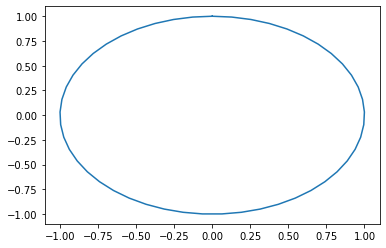

In [ ]:
# 기하에서 언급하면 될 듯
import numpy as np
import matplotlib.pyplot as plt

degrees = np.linspace(0,360)
x = np.sin(np.radians(degrees))
y = np.cos(np.radians(degrees))

plt.plot(x,y)
plt.show()

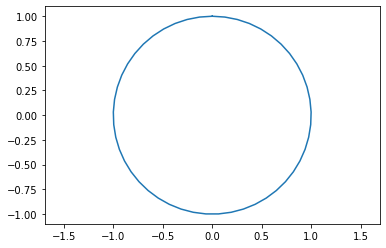

In [ ]:
# 기하에서 언급하면 될 듯
import numpy as np
import matplotlib.pyplot as plt

degrees = np.linspace(0,360)
x = np.sin(np.radians(degrees))
y = np.cos(np.radians(degrees))

plt.plot(x,y)
plt.axis('equal')
plt.show()

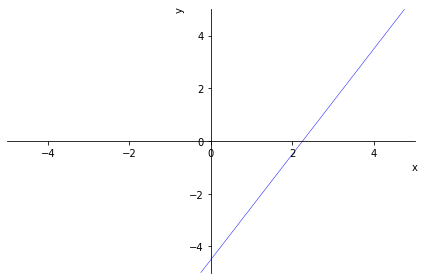

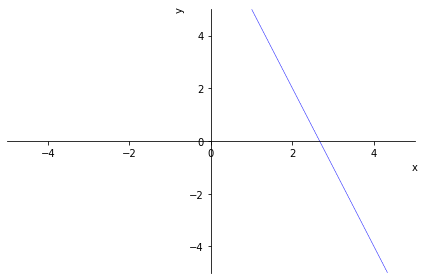

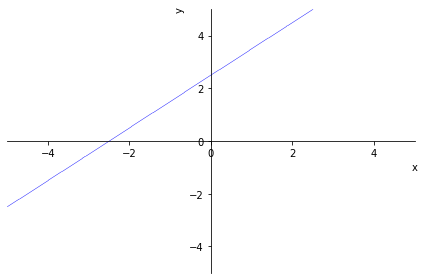

TypeError: ignored

In [ ]:
# 고급 그래프에서 3차원 그래프와 함께 언급하면 될 듯
import sympy as sp

x = sp.Symbol('x')
y = sp.Symbol('y')

f1 = sp.Eq(4*x - 2*y,9)
f2 = sp.Eq(3*x + y,8)
f3 = sp.Eq(-2*x + 2*y,5)

sp.plot_implicit(f1)
sp.plot_implicit(f2)
sp.plot_implicit(f3)
sp.plot_implicit(f1,f3)

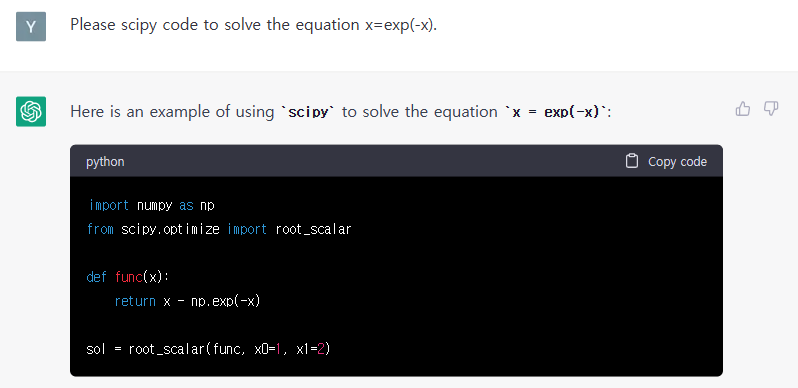

In [ ]:
# chatGPT가 코드해 준 x=exp(-x) 방정식의 근을 구해주는 코드
import numpy as np
from scipy.optimize import root_scalar

def func(x):
    return x - np.exp(-x)

sol = root_scalar(func, x0=1, x1=2)
sol

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.5671432904097838

In [ ]:
# chatGPT가 제시해준 scipy 미분방정식 예제 코드
import numpy as np
from scipy.integrate import solve_ivp

def ode_func(t, y, k):
    return -k * y

k = 2.0
y0 = 1.0
t_eval = np.linspace(0, 5, num=50)

sol = solve_ivp(lambda t, y: ode_func(t, y, k), [0, 5], [y0], t_eval=t_eval)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 74
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])
 t_events: None
        y: array([[1.00000000e+00, 8.15369277e-01, 6.64544769e-01, 5.41726258e-01,
        4.41941913e-01, 3.60673476e-01, 2.94070079e-

In [ ]:
# chatGPT가 제시해준 sympy 미분방정식 예제 코드
import sympy

t, y, k = sympy.symbols('t y k')
y = sympy.Function('y')(t)
ode = y.diff(t) + k * y
sol = sympy.dsolve(ode, y)
sol = sol.rhs
sol = sol.subs(k, 2.0)

In [ ]:
# chatGPT가 제시해준 sympy 미분방정식 예제 코드에 print()를 추가 -> C1을 상수로 바꾸어 주기 위하여 초기값을 주고 있으나 오류가 발생함
import sympy

t, y, k = sympy.symbols('t y k')
y = sympy.Function('y')(t)
ode = y.diff(t) + k * y
print(ode)
sol = sympy.dsolve(ode, y, ics={y(0):1})
print(sol)
sol = sol.rhs
print(sol)
sol = sol.subs(k, 2.0)
print(sol)

k*y(t) + Derivative(y(t), t)


TypeError: ignored

In [ ]:
*remains, last = [1,2,3,4]
print(remains)
print(last)

[1, 2, 3]
4


In [ ]:
first, *remains = list("문자열")
print(remains)
print(first)

['자', '열']
문


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chmod('/content/drive/MyDrive/your_file_name', 000)

In [ ]:
from vega_datasets import data
data.cars()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [ ]:
data.iris()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

[1.         0.98990014 0.96078824 0.9158958  0.85966154 0.79676464
 0.73136349 0.66668946 0.60496275 0.54751139 0.49497504 0.44751381
 0.40498323 0.36706486 0.33335595 0.30342708 0.27685653 0.25324922
 0.23224564 0.21352473 0.19680325 0.18183334 0.16839915 0.15631328
 0.14541326 0.13555828 0.12662626 0.11851126 0.11112118 0.10437588
 0.09820542 0.09254869 0.08735215 0.08256879 0.07815725 0.07408106
 0.07030794 0.06680934 0.06355988 0.06053698 0.05772049 0.05509242
 0.05263665 0.05033871 0.04818559 0.04616557 0.04426808 0.04248355
 0.04080331 0.03921952 0.03772502 0.0363133  0.03497845 0.03371504
 0.03251813 0.03138317 0.03030602 0.02928284 0.02831013 0.02738466
 0.02650344 0.02566371 0.02486295 0.02409878 0.02336904 0.0226717
 0.02200489 0.02136686 0.02075599 0.02017077 0.0196098  0.01907176
 0.01855543 0.01805967 0.01758339 0.0171256  0.01668536 0.01626179
 0.01585407 0.0154614  0.01508308 0.0147184  0.01436673 0.01402746
 0.01370001 0.01338384 0.01307845 0.01278334 0.01249807 0.01222

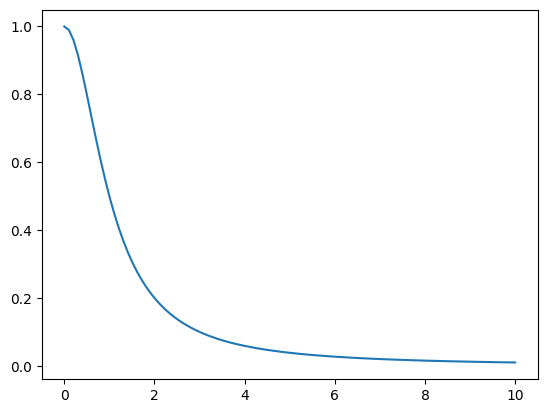

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def dydx(y,x):
    return -2.*x*y**2

x0 = 0
xmax = 10
y0 = 1

x = np.linspace(x0,xmax,100)
y = odeint(dydx,y0,x)
print(y[:,0])

plt.plot(x,y)
plt.show()

[[ 9.99983334e-01  3.33350000e-03]
 [ 9.99966671e-01 -4.99935090e-03]
 [ 9.99894463e-01 -9.25647419e-03]
 ...
 [ 1.73194257e-02 -1.73187477e-04]
 [ 1.73176940e-02 -1.73152853e-04]
 [ 1.73159627e-02 -1.73118240e-04]]


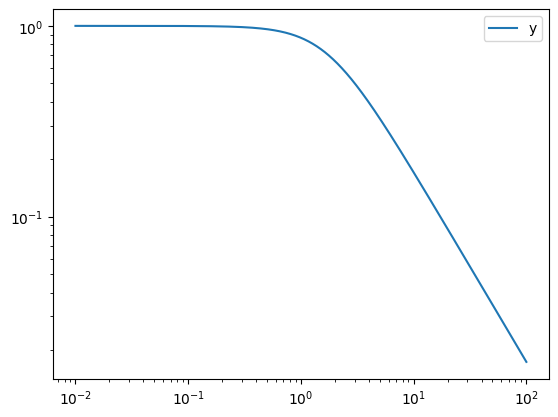

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def odef(y,r): # 레인-엠덴 2차 미분방정식(2차 연립미분방정식)
    dydt0 = y[1]
    dydt1 = -2*y[1]/r - y[0]**5
    return [dydt0,dydt1]

h = 0.01
h2 = h*h
yh = 1 - h2/6 + h2*h2/24
yph = h/3 + h*h2/6
y0 = np.array([yh,yph])

r0 = h
rmax = 100
r = np.linspace(r0,rmax,int(rmax/h))
y = odeint(odef,y0,r)
print(y)

plt.loglog(r,y[:,0],label='y')
#plt.loglog(r,y[:,1],label="y'")
plt.legend()
plt.show()

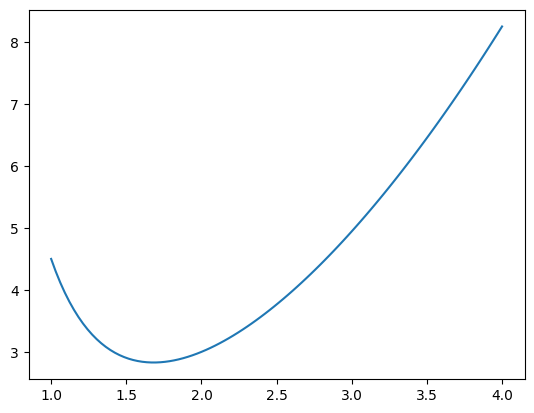

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def odef(y,x): # 사격법 (경계값 문제와 운동방정식)
    dydt0 = y[1]
    dydt1 = (8 + 3*x**4 - 6*x*y[0]*y[1])/8    # y'' =
    return [dydt0,dydt1]

x0, xmax = 1, 4   # 구간[1,4]에서
y0 = 9/2          # y(1) = 9/2
beta = 33/4       # y(4) = 33/4

x = np.linspace(x0,xmax,100)
tol = 1e-6

A1 = 0
A2 = 1
B2 = 0

loop = 0
while True:
    loop = loop + 1
    if loop == 1: yp = A1
    if loop == 2: yp = A2
    yini = np.array([y0,yp])
    yout = odeint(odef,yini,x)
    B1 = B2
    B2 = yout[-1,0]
    if loop >= 2:
        err = beta - B2
        if abs(err) < tol: break
        yp = A2 + (A2-A1)/(B2-B1) * err
        A1 = A2
        A2 = yp

y = yout[:,0]

plt.plot(x,y)
plt.show()


[[mpf('0.0')]
 [mpf('1.2735171248559007')]
 [mpf('-0.00055566912177258221')]
 [mpf('0.42524796027747158')]
 [mpf('-0.001115426211882212')]
 [mpf('0.25604604654152496')]
 [mpf('-0.0016834503663067139')]
 [mpf('0.18386328030904159')]
 [mpf('-0.0022641071144322575')]
 [mpf('0.14403167377573053')]
 [mpf('-0.0028620524104108029')]]


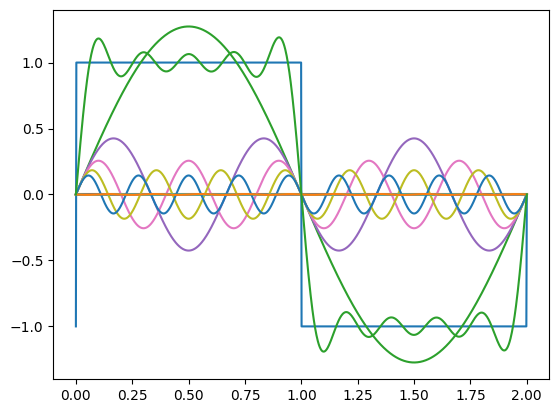

In [ ]:
import numpy as np
from mpmath import mp
import matplotlib.pyplot as plt

def func(t):        # T가 2인 사각파 (Squre Wave)
    if 0<t<1: return 1
    elif t<2: return -1
    else:     return 0

N = 10
T = 2

num = 1000
t = np.linspace(0,T,num)
f = np.zeros(num)
for i in range(num):
    f[i] = func(t[i])

#print(f)
plt.plot(t,f)

c,s = mp.fourier(func,[0,T],N)

n = np.arange(N+1)[:,np.newaxis]
#print(n)

#print(c)
an = np.array(c)[:,np.newaxis]
#print(an)
cos = an * np.cos(2*np.pi*n*t/T)
#print(cos)     # 모두 0
#plt.plot(t,cos.T)

#print(s)
bn = np.array(s)[:,np.newaxis]
print(bn)
sin = bn * np.sin(2*np.pi*n*t/T)
#print(sin)
plt.plot(t,sin.T)

plt.plot(t,sum(sin+cos))

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True,to_file='model.png')

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

message = tf.constant('Welcome to the exciting world of Deep Neural Networks!')

with tf.Session() as sess:
    print(sess.run(message))

Instructions for updating:
non-resource variables are not supported in the long term


b'Welcome to the exciting world of Deep Neural Networks!'


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

message = tf.constant('Welcome to the exciting world of Deep Neural Networks!')

with tf.Session() as sess:
    print(sess.run(message).decode())

Welcome to the exciting world of Deep Neural Networks!


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

v_1 = tf.constant([1,2,3,4])
v_2 = tf.constant([2,1,5,3])
#v_add = v_1 + v_2
v_add = tf.add(v_1,v_2)

with tf.Session() as sess:
    print(sess.run(v_add))

[3 3 8 7]


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

in_a = tf.placeholder(dtype=tf.float32,shape=(2))

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

in_a = tf.placeholder(dtype=tf.float32,shape=(2))

def model(x):
    with tf.variable_scope('MatMul',reuse=tf.AUTO_REUSE):
        W = tf.get_variable("W", initializer=tf.ones(shape=(2,2)))
        b = tf.get_variable("b", initializer=tf.ones(shape=(2)))
        return x * W + b

out_a = model(in_a)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outs = sess.run([out_a],feed_dict={in_a:[1,0]})
    writer = tf.summary.FileWriter("./logs/example",sess.graph)

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import tensorflow as tf

def linear_layer_1(x):
    return 3 * x

def linear_layer_2(x):
    return x + 2

@tf.function
def simple_nn(x):
    temp = linear_layer_1(x)
    return linear_layer_2(temp)

result = simple_nn(3)

print('Tensor Function 수행결과 (Tensor):',result)
print('Tensor Function 수행결과 (Numpy):',result.numpy())
#with t(f.compat.)v1.Session() as sess:
#    result = sess.run(result)
#    print(result)

Tensor Function 수행결과 (Tensor): tf.Tensor(11, shape=(), dtype=int32)
Tensor Function 수행결과 (Numpy): 11


In [ ]:
import tensorflow as tf
import numpy as np

num_items = 10
num_list = np.arange(num_items)

num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

for elem in num_list_dataset:
    print(elem)
    print(elem.numpy())

for batch in num_list_dataset.batch(5).shuffle(50).take(1):
    print(batch)
    print(batch.numpy())

tf.Tensor(0, shape=(), dtype=int64)
0
tf.Tensor(1, shape=(), dtype=int64)
1
tf.Tensor(2, shape=(), dtype=int64)
2
tf.Tensor(3, shape=(), dtype=int64)
3
tf.Tensor(4, shape=(), dtype=int64)
4
tf.Tensor(5, shape=(), dtype=int64)
5
tf.Tensor(6, shape=(), dtype=int64)
6
tf.Tensor(7, shape=(), dtype=int64)
7
tf.Tensor(8, shape=(), dtype=int64)
8
tf.Tensor(9, shape=(), dtype=int64)
9
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
[0 1 2 3 4]


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

datasets, info = tfds.load('imdb_reviews',with_info=True,as_supervised=True)

train_dataset = datasets['train']

for data in train_dataset.take(2):
    print(data[0])
    print(data[1])

for data in train_dataset.batch(5).shuffle(50).take(2):
    #print(data)
    print(data[0][0].numpy().decode())
    print(data[1][0].numpy())

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on t

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

datasets, info = tfds.load('mnist',with_info=True,as_supervised=True)

train_dataset = datasets['train']

for image, label in train_dataset.take(2):
    print(image.numpy().shape)
    print(label.numpy().shape)

for data in train_dataset.take(2):
    print(data[0].shape)
    print(data[1].numpy())

(28, 28, 1)
()
(28, 28, 1)
()
(28, 28, 1)
4
(28, 28, 1)
1


In [ ]:
(train_x,train_y),(test_x,test_y) = tf.keras.datasets.mnist.load_data()

my_feature_columns = []
for key in train_x.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

print(my_feature_columns)

AttributeError: ignored

In [ ]:
my_feature_columns = [tf.feature_column.numeric_column("image", shape=(28, 28))]
print(my_feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[NumericColumn(key='image', shape=(28, 28), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
import tensorflow as tf

# MNIST 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 입력 데이터 전처리: 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

# Feature Column 생성
feature_columns = [tf.feature_column.numeric_column("image", shape=(28, 28))]

# DNNClassifier 생성
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[256, 128],  # 은닉층의 유닛 수
    n_classes=10,  # 클래스 수
    model_dir='model_dir'  # 모델 저장 경로
)

# 입력 함수 생성
def input_fn(features, labels, batch_size, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((features, labels))
    if shuffle:
        dataset = dataset.shuffle(len(features))
    dataset = dataset.batch(batch_size)
    return dataset

# 학습 실행
classifier.train(
    input_fn=lambda: input_fn(train_images, train_labels, batch_size=32),
    steps=1000
)

# 평가 실행
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test_images, test_labels, batch_size=32)
)
print('Evaluation result:', eval_result)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


ValueError: ignored

In [ ]:
tf.constant([[1,2,3],[3,4],[5,6,7,8]])

ValueError: ignored

In [ ]:
tf.ragged.constant([[1,2,3],[3,4],[5,6,7,8]])

<tf.RaggedTensor [[11, 2, 3], [3, 4], [5, 6, 7, 8]]>

In [ ]:
import tensorflow as tf

x = tf.constant(4.0)

with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    y = x * x
    z = y * y

dz_dx = g.gradient(z,x)
print(dz_dx)
dy_dx = g.gradient(y,x)
print(dy_dx.numpy())

del g

tf.Tensor(256.0, shape=(), dtype=float32)
8.0


In [ ]:
import os

try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))
except KeyError:
  print('TPU not found')

Found TPU at: grpc://10.91.186.34:8470


In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [ ]:
val_result

{'average_loss': 58.556442,
 'label/mean': 23.078432,
 'loss': 57.802376,
 'prediction/mean': 21.914986,
 'global_step': 300}

In [ ]:
predict_result

<generator object Estimator.predict at 0x7fd32f64e490>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 수집 및 전처리
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

# 모델 훈련
model = tf.keras.Sequential()             # 인공신경망 모델 정의
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd,loss='mse')   # 인공신경망 모델 컴파일

tensorboard = tf.keras.callbacks.TensorBoard(log_dir='tensorboard')
model.fit(x,y,epochs=1000,verbose=False,callbacks=[tensorboard])